In [1]:
import unittest
import matplotlib
from neuronunit.allenapi.allen_data_driven import opt_setup, opt_setup_two, opt_exec
from neuronunit.allenapi.allen_data_driven import opt_to_model, meta_setup
from neuronunit.allenapi.utils import dask_map_function

/home/user/anaconda3/lib/python3.7/site-packages/cerberus/validator.py:1609: UserWarning: No validation schema is defined for the arguments of rule 'not_zero_obs_zscore'
  "'%s'" % method_name.split('_', 2)[-1]
/home/user/anaconda3/lib/python3.7/site-packages/airspeed/__init__.py:505: FutureWarning: Possible nested set at position 8
  KEYVALSEP = re.compile(r'[ \t]*:[[ \t]*(.*)$', re.S)
test


except:
   from bluepyopt.allenapi.allen_data_driven import opt_setup, opt_setup_two, opt_exec, opt_to_model
   from bluepyopt.allenapi.allen_data_driven import opt_to_model
   from bluepyopt.allenapi.utils import dask_map_function

In [2]:
from neuronunit.optimization.optimization_management import check_bin_vm15
from neuronunit.optimization.model_parameters import MODEL_PARAMS, BPO_PARAMS, to_bpo_param
from neuronunit.optimization.optimization_management import dtc_to_rheo,inject_and_plot_model
import numpy as np
from neuronunit.optimization.data_transport_container import DataTC
import efel
from jithub.models import model_classes
import matplotlib.pyplot as plt
import quantities as qt
import os
from sciunit.scores import RelativeDifferenceScore,ZScore

In [3]:
class testOptimization(unittest.TestCase):
    def setUp(self):
        self = self
        self.ids = [ 324257146,
                325479788,
                476053392,
                623893177,
                623960880,
                482493761,
                471819401
               ]

    def test_opt_relative_diff(self):
        specimen_id = self.ids[1]
        model_type = "ADEXP"

        if model_type == "IZHI":
            model = model_classes.IzhiModel()
        if model_type == "MAT":
            model = model_classes.MATModel()
        if model_type == "ADEXP":
            model = model_classes.ADEXPModel()


        target_num_spikes = 8 # This is the number of spikes to look for in the data

        fixed_current = 122 *qt.pA
        NGEN = 45
        MU = 12
        mapping_funct = dask_map_function
        cell_evaluator,simple_cell,suite,target_current,spk_count = meta_setup(specimen_id,
                  model_type,
                  target_num_spikes,
                  template_model=model,
                  fixed_current=False,
                  cached=True,score_type=RelativeDifferenceScore)
        final_pop, hall_of_fame, logs, hist = opt_exec(MU,NGEN,mapping_funct,cell_evaluator)
        opt,target = opt_to_model(hall_of_fame,cell_evaluator,suite, target_current, spk_count)
        best_ind = hall_of_fame[0]
        fitnesses = cell_evaluator.evaluate_with_lists(best_ind)
        target.vm15 = suite.traces['vm15']
        check_bin_vm15(target,opt)        
        #self.assertGreater(0.7,np.sum(fitnesses))
    def test_opt_ZScore(self):
        specimen_id = self.ids[1]
        model_type = "ADEXP"

        if model_type == "IZHI":
            model = model_classes.IzhiModel()
        if model_type == "MAT":
            model = model_classes.MATModel()
        if model_type == "ADEXP":
            model = model_classes.ADEXPModel()


        target_num_spikes = 8
        dtc = DataTC()
        dtc.backend = model_type
        dtc._backend = model._backend
        dtc.attrs = model.attrs
        dtc.params = {k:np.mean(v) for k,v in MODEL_PARAMS[model_type].items()}

        fixed_current = 122 *qt.pA
        NGEN = 45
        MU = 12
        mapping_funct = dask_map_function
        cell_evaluator,simple_cell,suite,target_current,spk_count = meta_setup(specimen_id,
                  model_type,
                  target_num_spikes,
                  template_model=model,
                  fixed_current=False,
                  cached=True,score_type=ZScore)
        final_pop, hall_of_fame, logs, hist = opt_exec(MU,NGEN,mapping_funct,cell_evaluator)
        opt,target = opt_to_model(hall_of_fame,cell_evaluator,suite, target_current, spk_count)
        best_ind = hall_of_fame[0]
        fitnesses = cell_evaluator.evaluate_with_lists(best_ind)
        target.vm15 = suite.traces['vm15']
        check_bin_vm15(target,opt)
        #try:
        #    assert 0.7>np.sum(fitnesses)
        #except:
        print(0.7>np.sum(fitnesses))
        


In [4]:
tt = testOptimization()
tt.setUp()

# Z score works

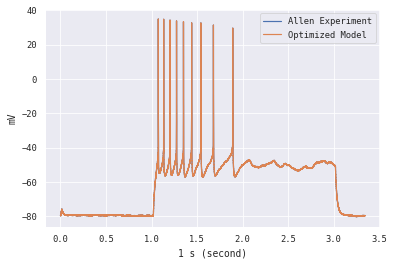

ADEXPModel <jithub.models.backends.adexp.JIT_ADEXPBackend object at 0x7f2dc39add10>
ADEXPModel <jithub.models.backends.adexp.JIT_ADEXPBackend object at 0x7f2dc39add10>


gen	nevals	avg    	std    	min    	max  
1  	12    	6298.88	9930.27	5.16747	22000


2  	5     	5513   	9518.79	5.16747	22000
3  	7     	24.797 	24.3271	1.06407	77.56
4  	10    	6.99067	2.76584	1.06407	13.6595
5  	5     	3.81736	3.18162	0.981915	9.29937
6  	6     	3.65127	2.57383	0.981915	6.91363
7  	10    	2.52413	2.19394	0.981915	6.60737
8  	7     	3.09085	2.39791	0.981915	7.38082
9  	8     	3.49101	2.32711	0.617667	6.12145
10 	7     	0.897581	0.243313	0.617667	1.59896
11 	6     	0.860469	0.229198	0.617667	1.55481
12 	8     	1.20713 	0.563197	0.617667	2.50251
13 	7     	0.617667	0       	0.617667	0.617667
14 	8     	0.617667	0       	0.617667	0.617667
15 	9     	0.617667	0       	0.617667	0.617667
16 	9     	0.734059	0.247669	0.617667	1.39824 
17 	9     	0.963737	0.332461	0.617667	1.55852 
18 	9     	1.18575 	0.304462	0.617667	1.81047 
19 	5     	1.02522 	0.218919	0.617667	1.23894 
20 	6     	1.01039 	0.200831	0.617667	1.34861 
21 	9     	0.800991	0.174297	0.590786	1.37906 
22 	7     	0.823014	0.532035	0.496729	2.85104 
23 	9     	0.736134	0.198444	0.467458	1.25432 


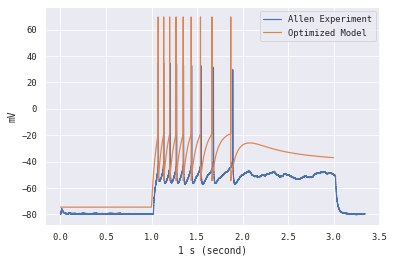

True


In [5]:

tt.test_opt_ZScore()


# Relative DIfference Does not work

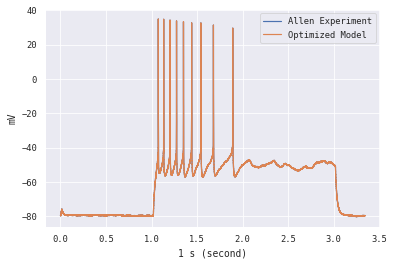

ADEXPModel <jithub.models.backends.adexp.JIT_ADEXPBackend object at 0x7f2dc1cf4790>
ADEXPModel <jithub.models.backends.adexp.JIT_ADEXPBackend object at 0x7f2dc1cf4790>


gen	nevals	avg    	std    	min    	max  
1  	12    	7284.65	9340.56	567.194	22000


2  	5     	6497.93	8983.45	567.194	22000
3  	7     	777.684	242.508	235.365	1250.62
4  	10    	742.865	267.601	235.365	1169.48
5  	8     	678.812	380.807	61.5328	1279.63
6  	9     	660.585	409.599	18.8066	1347.14
7  	9     	51.3298	65.3723	18.2966	244.973
8  	9     	124.756	98.9169	18.2966	318.948
9  	5     	60.0446	11.3558	18.2966	63.8139
10 	7     	55.3502	12.9475	18.2966	63.8139
11 	8     	61.6096	54.9918	18.2966	247.78 
12 	9     	199.402	185.042	18.2966	591.361
13 	4     	110.317	97.3288	18.2966	410.031
14 	9     	32.5995	14.6268	18.1847	57.4616
15 	10    	46.1536	51.5964	18.0925	186.868
16 	10    	70.6893	62.8574	14.8841	186.868
17 	5     	104.924	64.5244	14.8841	187.769
18 	8     	59.909 	73.3691	14.8841	186.868
19 	7     	104.46 	73.6963	14.8841	193.294
20 	8     	108.558	57.7844	14.8841	195.22 
21 	4     	58.9571	42.9224	14.8841	115.515
22 	8     	80.2997	61.1717	14.8841	275.324
23 	7     	93.8765	60.2754	14.8841	275.324
24 	6     	78.4232	44.0562	14.8841	138.841
25 	6     	75

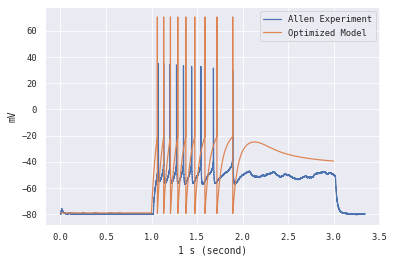

In [6]:

tt.test_opt_relative_diff()